<a href="https://colab.research.google.com/github/DSKI23/alzheimervalentin/blob/11-ml-algorithmus/Modell/RFC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
!pip install -r "https://raw.githubusercontent.com/DSKI23/alzheimervalentin/refs/heads/main/requirements_colab.txt"

In [16]:
from huggingface_hub import HfApi
from huggingface_hub import notebook_login, login
from datasets import load_dataset
from sklearn.model_selection import train_test_split
import pandas as pd
import os
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

In [17]:
#checking enviorment variables, so that the github actions can execute the file as well.

if 'state' in os.environ:
    state = int(os.environ['state'])
else:
    state = 42

np.random.seed(state)

if 'huggingface_token' in os.environ:
    login(token= os.environ['huggingface_token'])
else:
    notebook_login()

In [18]:
#load the dataset from huggingface
dataset = load_dataset("DS23-KI-Projekt/alzheimerdataset_split")
dataset

DatasetDict({
    train: Dataset({
        features: ['Age', 'BMI', 'Education Level', 'Gender', 'Family History of Alzheimer’s', 'Cognitive Test Score', 'Genetic Risk Factor (APOE-ε4 allele)', 'Alzheimer’s Diagnosis'],
        num_rows: 59426
    })
    validation: Dataset({
        features: ['Age', 'BMI', 'Education Level', 'Gender', 'Family History of Alzheimer’s', 'Cognitive Test Score', 'Genetic Risk Factor (APOE-ε4 allele)', 'Alzheimer’s Diagnosis'],
        num_rows: 14857
    })
})

In [19]:
# 1. Datensatz
df = dataset['train'].to_pandas()
df.head()


,Age,BMI,Education Level,Gender,Family History of Alzheimer’s,Cognitive Test Score,Genetic Risk Factor (APOE-ε4 allele),Alzheimer’s Diagnosis
0,53,19.7,9,1,0,66,0,0
1,92,31.2,9,0,1,99,0,1
2,64,20.7,5,0,1,59,0,0
3,85,19.1,17,1,1,81,0,0
4,55,20.6,4,0,1,65,0,0


<ipython-input-20-d65a3c488053>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance['Importance'], y=feature_importance['Feature'], palette="viridis")


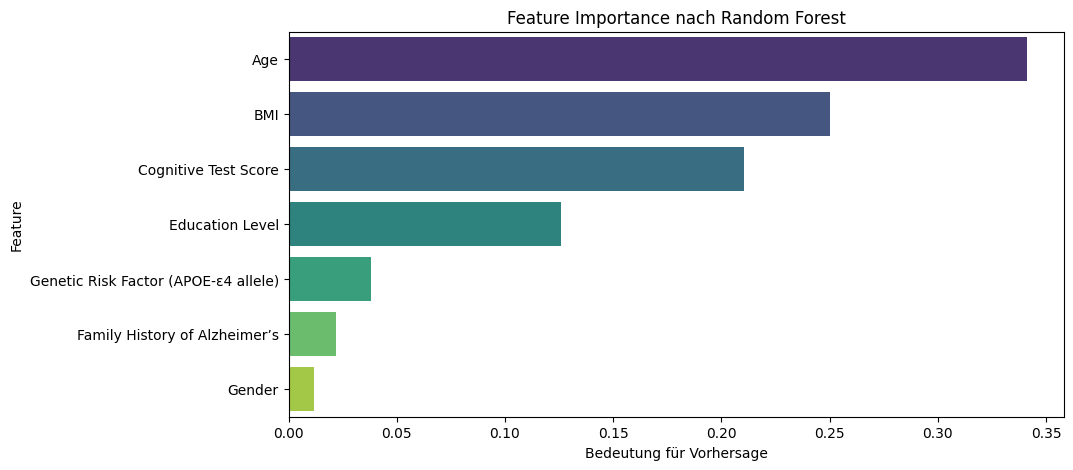

<ipython-input-20-d65a3c488053>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=alzheimers_count.index, y=alzheimers_count.values, palette="coolwarm")


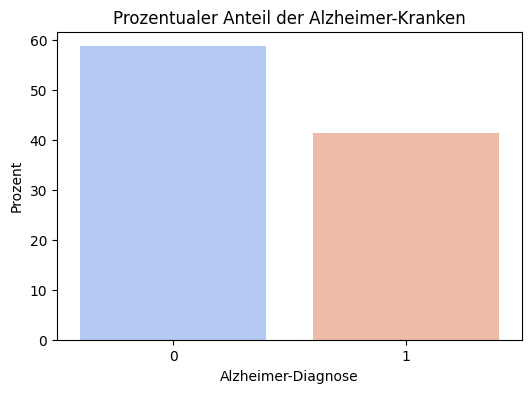

In [20]:
# 2. Zielvariable und Features
target = 'Alzheimer’s Diagnosis'
features = df.columns.tolist()
features.remove(target)

X = df[features]
y = df[target]


In [23]:
# Daten in Trainings- und Testset aufteilen 80 20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=state, stratify=y)

# Random Forest initialisieren
rf_model = RandomForestClassifier(n_estimators=50, random_state=state)

# Modell trainieren
rf_model.fit(X_train, y_train)

# Vorhersagen auf dem Testset
y_pred = rf_model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Klassifikationsbericht + Konfusionsmatrix
print("Klassifikationsbericht:")
print(classification_report(y_test, y_pred))

print("Konfusionsmatrix:")
print(confusion_matrix(y_test, y_pred))

if not os.path.exists('random_forest_alzheimer'):
    os.makedirs('random_forest_alzheimer')

with open('random_forest_alzheimer.pkl', 'wb') as file:
    pickle.dump(rf_model, file)


In [22]:
# Modell speichern .pkl-Datei
model_filename = "random_forest_alzheimer.pkl"

# Repository-Name auf Hugging Face (anpassen!)
hf_repo_name = "DS23-KI-Projekt/KI-Modell"

# Falls das Repository nicht existiert, erstelle es
api = HfApi()
api.create_repo(repo_id=hf_repo_name, exist_ok=True)

# Modell hochladen
api.upload_file(
    path_or_fileobj=model_filename,  # Die gespeicherte Modell-Datei
    path_in_repo=model_filename,  # Name im Hugging Face Repo
    repo_id=hf_repo_name,  # Dein Repository
    commit_message="Upload des Random Forest Modells für Alzheimer-Diagnose"
)

print(f" Modell hochgeladen auf Hugging Face: https://huggingface.co/{hf_repo_name}")


random_forest_alzheimer.pkl:   0%|          | 0.00/93.1M [00:00<?, ?B/s]